# Notes



### a. Input and Output Parameters:

1. **kMeans**:
   - Input Parameters:
     - `n_clusters`: Number of clusters to form.
     - `init`: Method for initialization ('k-means++', 'random', ndarray, or callable).
     - `n_init`: Number of times the algorithm will be run with different centroid seeds.
   - Output:
     - `labels_`: Cluster labels for each data point.
     - `cluster_centers_`: Coordinates of cluster centers.

2. **Agglomerative Clustering**:
   - Input Parameters:
     - `n_clusters`: Number of clusters to form.
     - `linkage`: Linkage criterion ('ward', 'complete', 'average', 'single').
     - `affinity`: Metric used to compute linkage ('euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed').
   - Output:
     - `labels_`: Cluster labels for each data point.

3. **DBSCAN**:
   - Input Parameters:
     - `eps`: Maximum distance between two samples for them to be considered as in the same neighborhood.
     - `min_samples`: Number of samples in a neighborhood for a point to be considered as a core point.
   - Output:
     - `labels_`: Cluster labels for each data point (-1 for noise).

### b. Cluster Quality Metrics:

1. Silhouette Score:
   - Measures how similar an object is to its own cluster compared to other clusters. Range: [-1, 1].
   - Higher score indicates better clustering.

2. Jaccard Index:
   - Measures the similarity between two sets of data. For clustering, it's used to compare true clusters with predicted clusters.
   - Range: [0, 1]. Higher is better.

3. Davis-Bouldin Index:
   - Measures the average similarity between each cluster and its most similar cluster.
   - Lower index indicates better clustering.

c. Elbow Method:

- The Elbow Method is used to determine the optimal number of clusters for kMeans by plotting the within-cluster sum of squares (inertia) against the number of clusters.
- The "elbow" point represents the optimal number of clusters where adding more clusters does not significantly reduce the inertia.
- Helps in selecting a suitable value for `n_clusters` in kMeans.



In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [53]:
# Step 1: Download the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

In [54]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [55]:
df.shape

(344, 7)

In [56]:

# Count the number of null values in each column
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [57]:
# Drop rows with any null values
df.dropna(inplace=True)

In [58]:
df.shape

(333, 7)

In [59]:
# Step 2: Perform visualizations and pre-processing
# Drop the 'Species' column as it is the target column

df.drop('species', axis=1, inplace=True)

In [60]:
df.shape

(333, 6)

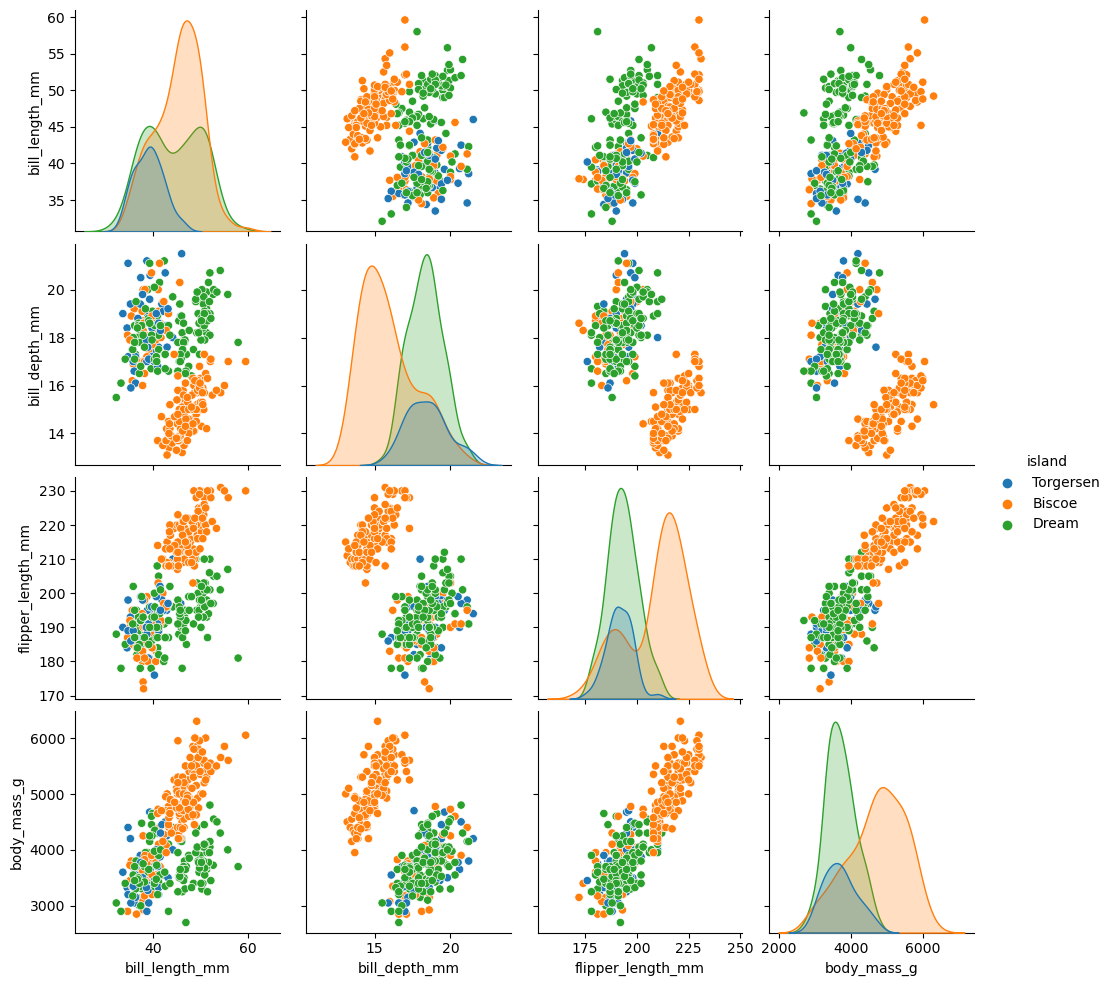

In [61]:
# Visualize the data using pairplot
sns.pairplot(df, hue='island')
plt.show()

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [63]:
# Drop original categorical columns if needed
df.drop(categorical_cols, axis=1, inplace=True)

In [64]:
df.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,2,1
1,39.5,17.4,186.0,3800.0,2,0
2,40.3,18.0,195.0,3250.0,2,0
4,36.7,19.3,193.0,3450.0,2,0
5,39.3,20.6,190.0,3650.0,2,1
6,38.9,17.8,181.0,3625.0,2,0
7,39.2,19.6,195.0,4675.0,2,1
12,41.1,17.6,182.0,3200.0,2,0
13,38.6,21.2,191.0,3800.0,2,1
14,34.6,21.1,198.0,4400.0,2,1


In [65]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [66]:
# Apply kMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [67]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_data)

In [68]:

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

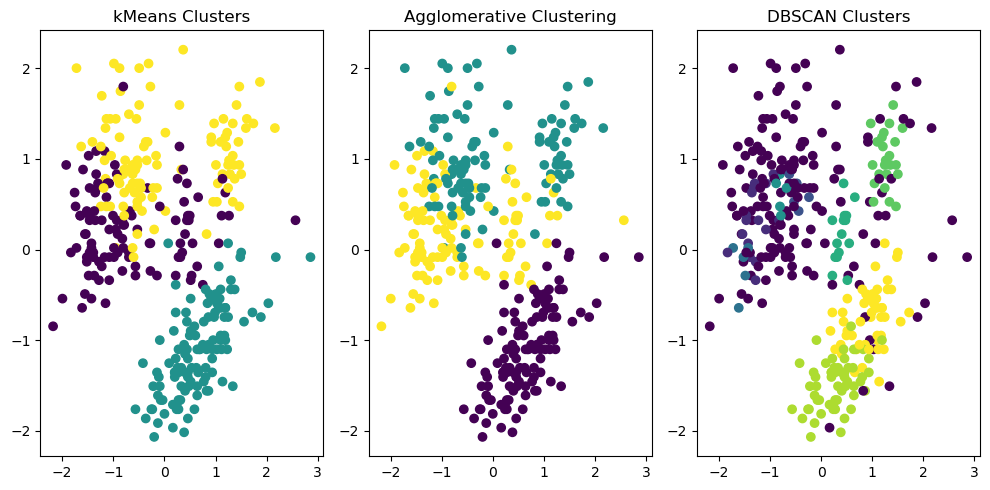

In [69]:
# Step 4: Visualize the clusters
# Plot kMeans clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('kMeans Clusters')

# Plot Agglomerative Clustering clusters
plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# Plot DBSCAN clusters
plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters')

plt.tight_layout()
plt.show()

In [70]:
# Step 5: Analysis
# a. Compare clusters formed by clustering scheme and classes in the data
# Compare kMeans clusters with the 'island' column
kmeans_comparison = pd.DataFrame({'kMeans Cluster': kmeans_labels, 'Island': df['island_encoded']})
print(kmeans_comparison.head())

   kMeans Cluster  Island
0               2       2
1               0       2
2               0       2
4               0       2
5               2       2


In [71]:

# In general, a Silhouette score closer to 1 suggests that the clusters are well-separated and distinct. Conversely, a score closer to -1 indicates overlapping clusters, and a score around 0 suggests that the clusters are not clearly separable.





# b. Experiment with different values of k in kMeans and check cluster quality metrics (e.g., silhouette score)
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans_labels))

print("Silhouette Scores for different values of k in kMeans:")
for k, score in zip(range(2, 6), silhouette_scores):
    print(f"Number of clusters (k): {k}, Silhouette Score: {score}")

Silhouette Scores for different values of k in kMeans:
Number of clusters (k): 2, Silhouette Score: 0.4363258747905644
Number of clusters (k): 3, Silhouette Score: 0.4110117788705368
Number of clusters (k): 4, Silhouette Score: 0.4499727715893848
Number of clusters (k): 5, Silhouette Score: 0.4472636052401441


In [72]:
# c. Vary parameters of DBSCAN and AgglomerativeClustering algorithms and observe effects
# Varying epsilon (eps) and min_samples in DBSCAN
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)
        print(f"DBSCAN with eps={eps}, min_samples={min_samples}: Number of clusters: {len(set(dbscan_labels))}")

# Varying linkage and distance_threshold in AgglomerativeClustering
linkage_types = ['ward', 'complete', 'average']
distance_thresholds = [0, 0.5, 1.0]

for linkage in linkage_types:
    for distance_threshold in distance_thresholds:
        agg_clustering = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=distance_threshold)
        agg_labels = agg_clustering.fit_predict(scaled_data)
        print(f"Agglomerative Clustering with linkage={linkage}, distance_threshold={distance_threshold}: "
              f"Number of clusters: {len(set(agg_labels))}")

DBSCAN with eps=0.1, min_samples=3: Number of clusters: 1
DBSCAN with eps=0.1, min_samples=5: Number of clusters: 1
DBSCAN with eps=0.1, min_samples=7: Number of clusters: 1
DBSCAN with eps=0.5, min_samples=3: Number of clusters: 18
DBSCAN with eps=0.5, min_samples=5: Number of clusters: 9
DBSCAN with eps=0.5, min_samples=7: Number of clusters: 6
DBSCAN with eps=1.0, min_samples=3: Number of clusters: 10
DBSCAN with eps=1.0, min_samples=5: Number of clusters: 10
DBSCAN with eps=1.0, min_samples=7: Number of clusters: 10
Agglomerative Clustering with linkage=ward, distance_threshold=0: Number of clusters: 333
Agglomerative Clustering with linkage=ward, distance_threshold=0.5: Number of clusters: 201
Agglomerative Clustering with linkage=ward, distance_threshold=1.0: Number of clusters: 94
Agglomerative Clustering with linkage=complete, distance_threshold=0: Number of clusters: 333
Agglomerative Clustering with linkage=complete, distance_threshold=0.5: Number of clusters: 201
Agglomerati